# DCS 630 Predictive Analytics
## Bellevue University
## Term Project - Credit Card Fraud Detection
## Author: Gyan Kannur
## Date: 09/03/2025

**Importing the necessary libraries**

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

**Load the DataSet**

In [79]:
df_all=pd.read_csv('./datasets-project/application_data.csv')

In [106]:
df=df_all.copy()

**EDA**

In [81]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df.iloc[1]

SK_ID_CURR                        100003
TARGET                                 0
NAME_CONTRACT_TYPE            Cash loans
CODE_GENDER                            F
FLAG_OWN_CAR                           N
                                 ...    
AMT_REQ_CREDIT_BUREAU_DAY            0.0
AMT_REQ_CREDIT_BUREAU_WEEK           0.0
AMT_REQ_CREDIT_BUREAU_MON            0.0
AMT_REQ_CREDIT_BUREAU_QRT            0.0
AMT_REQ_CREDIT_BUREAU_YEAR           0.0
Name: 1, Length: 122, dtype: object

In [83]:
df.shape

(307511, 122)

In [84]:
df.size

37516342

In [85]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [107]:
df.drop(["SK_ID_CURR","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","FLAG_MOBIL",
         "FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT",
         "REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","NAME_TYPE_SUITE",
         "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"],axis=1,inplace=True)

In [108]:
df.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [88]:
df.tail()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
307506,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Sales staff,THURSDAY,15,...,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898
307507,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,NaN,MONDAY,8,...,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,0.0214
307508,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Managers,THURSDAY,9,...,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,0.7970
307509,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Laborers,WEDNESDAY,9,...,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,0.0086
307510,0,Cash loans,157500.0,675000.0,49117.5,675000.0,Commercial associate,Laborers,THURSDAY,20,...,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0805,NaN,0.0000,0.0718


In [89]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATIO

In [109]:
df.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','NAME_CONTRACT_TYPE',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE','WEEKDAY_APPR_PROCESS_START',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI','OCCUPATION_TYPE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],axis=1,inplace=True)

In [91]:
df.shape

(307511, 8)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TARGET                   307511 non-null  int64  
 1   AMT_INCOME_TOTAL         307511 non-null  float64
 2   AMT_CREDIT               307511 non-null  float64
 3   AMT_ANNUITY              307499 non-null  float64
 4   AMT_GOODS_PRICE          307233 non-null  float64
 5   NAME_INCOME_TYPE         307511 non-null  object 
 6   HOUR_APPR_PROCESS_START  307511 non-null  int64  
 7   ORGANIZATION_TYPE        307511 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 18.8+ MB


In [93]:
df.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000
mean,0.080729,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,12.063419
std,0.272419,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,3.265832
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,12.000000
75%,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,14.000000
max,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


**Missing Numbes**

In [110]:
def missing (df1):
    missing_number = df1.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

**Fill Null values with Mean, median and Mode**

In [95]:
df.isnull().sum()

TARGET                       0
AMT_INCOME_TOTAL             0
AMT_CREDIT                   0
AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_INCOME_TYPE             0
HOUR_APPR_PROCESS_START      0
ORGANIZATION_TYPE            0
dtype: int64

In [96]:
#fill null values with mean,median ,mode
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
print(df)

        TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            1          202500.0    406597.5      24700.5         351000.0   
1            0          270000.0   1293502.5      35698.5        1129500.0   
2            0           67500.0    135000.0       6750.0         135000.0   
3            0          135000.0    312682.5      29686.5         297000.0   
4            0          121500.0    513000.0      21865.5         513000.0   
...        ...               ...         ...          ...              ...   
307506       0          157500.0    254700.0      27558.0         225000.0   
307507       0           72000.0    269550.0      12001.5         225000.0   
307508       0          153000.0    677664.0      29979.0         585000.0   
307509       1          171000.0    370107.0      20205.0         319500.0   
307510       0          157500.0    675000.0      49117.5         675000.0   

            NAME_INCOME_TYPE  HOUR_APPR_PROCESS_START       ORG

C:\Users\gyanr\AppData\Local\Temp\ipykernel_42084\2933836453.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\gyanr\AppData\Local\Temp\ipykernel_42084\2933836453.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [97]:
df.isnull().sum()

TARGET                     0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
NAME_INCOME_TYPE           0
HOUR_APPR_PROCESS_START    0
ORGANIZATION_TYPE          0
dtype: int64

In [98]:
df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,202500.0,406597.5,24700.5,351000.0,Working,10,Business Entity Type 3
1,0,270000.0,1293502.5,35698.5,1129500.0,State servant,11,School
2,0,67500.0,135000.0,6750.0,135000.0,Working,9,Government
3,0,135000.0,312682.5,29686.5,297000.0,Working,17,Business Entity Type 3
4,0,121500.0,513000.0,21865.5,513000.0,Working,11,Religion


**Split the Numeric and Catagorical Data**

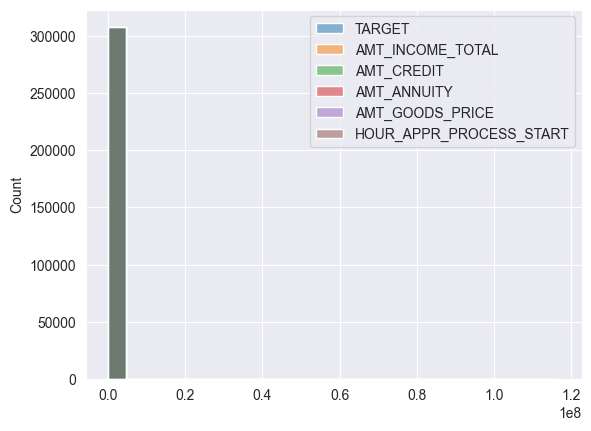

In [99]:
sns.histplot(df,bins=25)
plt.show()

In [30]:
# finding numerical data and categorical data in dataset
numerical= df.drop(['TARGET'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


Categorical Columns: Index(['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE'], dtype='object')


**Count Plot**

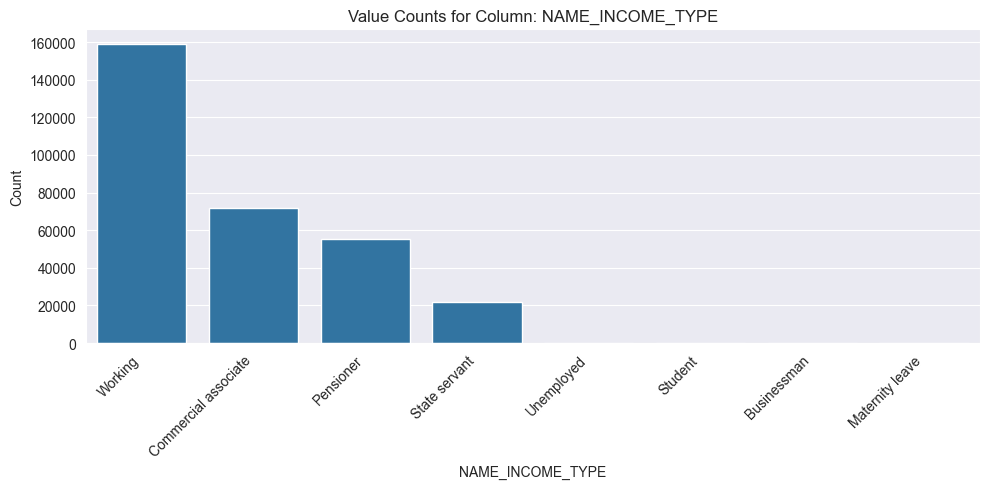

Skipping column 'ORGANIZATION_TYPE' — too many unique values (58)


In [43]:
# Select only object-type columns
for col in df.select_dtypes(include='object').columns:
    # Skip columns with too many unique values (optional)
    if df[col].nunique() > 35:
        print(f"Skipping column '{col}' — too many unique values ({df[col].nunique()})")
        continue

    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)

    plt.title(f'Value Counts for Column: {col}')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

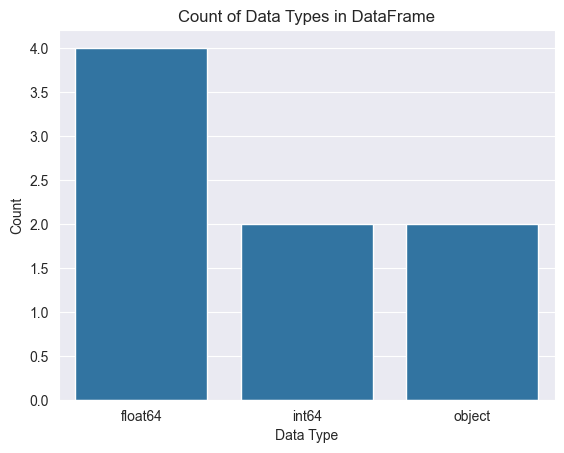

In [44]:
# Convert data types to strings and count them
dtype_counts = df.dtypes.astype(str).value_counts().reset_index()
dtype_counts.columns = ['dtype', 'count']

# Plot using seaborn
sns.barplot(data=dtype_counts, x='dtype', y='count')
plt.title('Count of Data Types in DataFrame')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

**Apply the Label Encoding**

Label encoding is the process of transforming labels into a numeric form so that they may be read by machines. The operation of those labels can then be better determined by machine learning techniques. It is a significant supervised learning pre-processing step for the structured dataset.

In [111]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
col = ['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE']

for i in col:
    df[i] =label_encoder.fit_transform(df[i] )
df.head()



,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,202500.0,406597.5,24700.5,351000.0,7,10,5
1,0,270000.0,1293502.5,35698.5,1129500.0,4,11,39
2,0,67500.0,135000.0,6750.0,135000.0,7,9,11
3,0,135000.0,312682.5,29686.5,297000.0,7,17,5
4,0,121500.0,513000.0,21865.5,513000.0,7,11,37


**Find out Statistical values**

In [47]:
for col in df.columns:
    if df[col].dtypes != object:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('mean:',df[col].mean())
        print('mode:',df[col].mode()[0])
        print('median:',df[col].median())
        print('skewness:',df[col].skew())
        print('kurtosis:',df[col].kurtosis())
        print('null_value count:',df[col].isnull().sum())
        print('\n')

column name TARGET
mean: 0.08072881945686496
mode: 0
median: 0.0
skewness: 3.0781586659196685
kurtosis: 7.475109389392569
null_value count: 0


column name AMT_INCOME_TOTAL
mean: 168797.9192969845
mode: 135000.0
median: 147150.0
skewness: 391.5596541041876
kurtosis: 191786.55438080415
null_value count: 0


column name AMT_CREDIT
mean: 599025.9997057016
mode: 450000.0
median: 513531.0
skewness: 1.2347784971349398
kurtosis: 1.9340413008324937
null_value count: 0


column name AMT_ANNUITY
mean: 27108.48784108536
mode: 9000.0
median: 24903.0
skewness: 1.5798237246955467
kurtosis: 7.7077559537369025
null_value count: 0


column name AMT_GOODS_PRICE
mean: 538316.2943667056
mode: 450000.0
median: 450000.0
skewness: 1.350142549635089
kurtosis: 2.4374401731304225
null_value count: 0


column name NAME_INCOME_TYPE
mean: 4.670288217332063
mode: 7
median: 7.0
skewness: -0.3550757581538051
kurtosis: -1.5948494738474766
null_value count: 0


column name HOUR_APPR_PROCESS_START
mean: 12.0634188695688

**Outliers**

A data point that is an outlier in a data graph or dataset you are dealing with is one that is extraordinarily high or extraordinarily low in comparison to the nearest data point and the rest of the nearby coexisting values. Outliers in a dataset or graph are extreme values that stand out significantly from the main pattern of values.

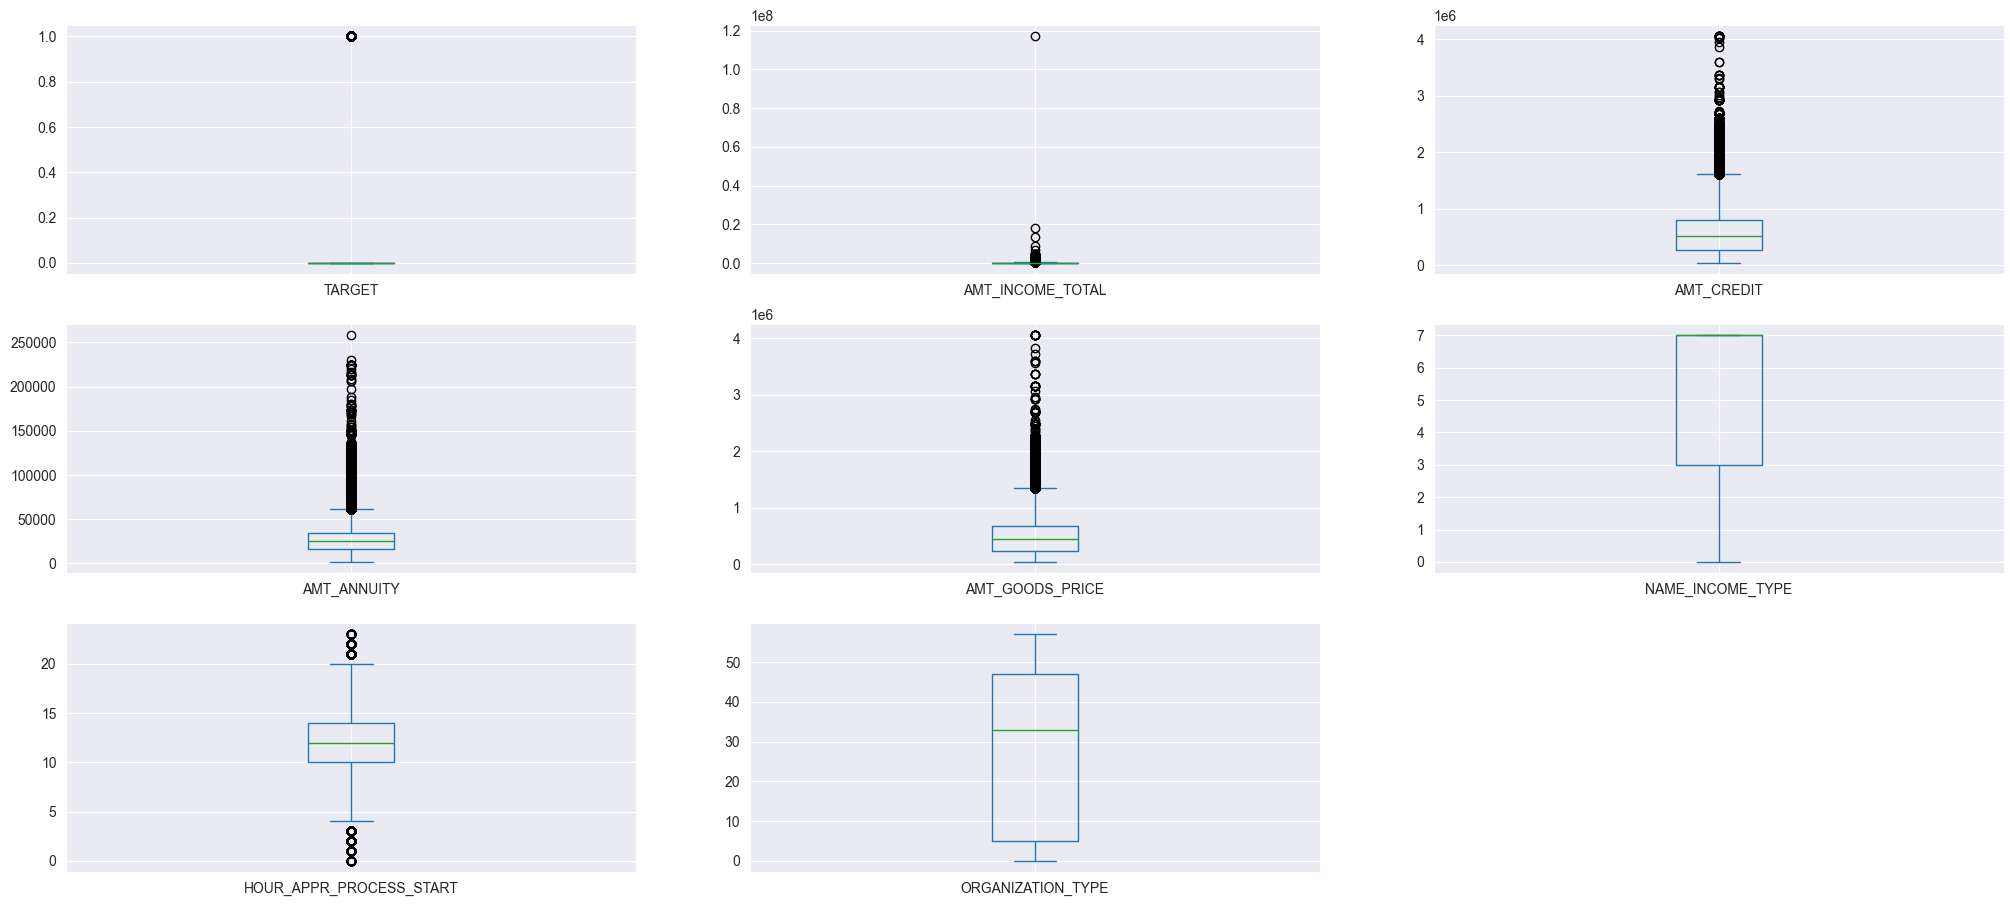

In [49]:
#checking outliers
#Outlier Search: This helps you to get some insights about the outliers in the data.
df.plot(kind='box', layout=(3,3),subplots=True,figsize=(25,11))
plt.show()

In [51]:
def out_to_null(out_df):
    Q1 = out_df.quantile(0.25)
    Q3 = out_df.quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = ((out_df < (Q1 - 1.5 * IQR)) | (out_df > (Q3 + 1.5 * IQR)))
    outlier_counts = outliers.sum()
    print("Outlier count per column:\n", outlier_counts)

**PairPlot**

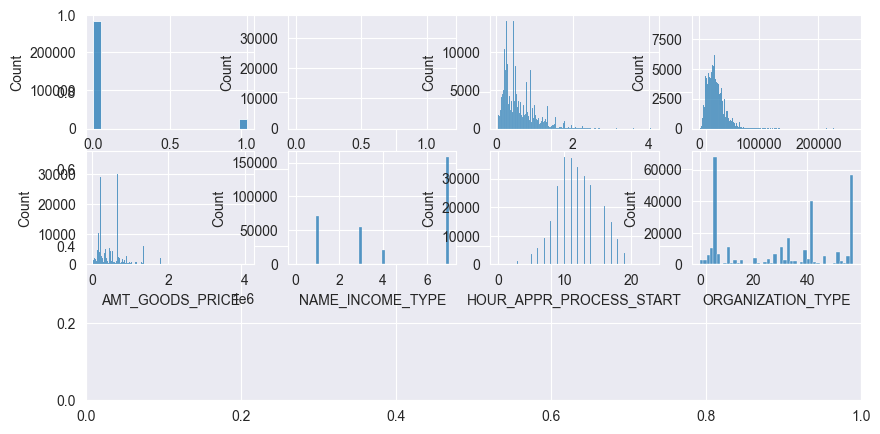

In [55]:
count=1
plt.subplots(figsize=(10,5))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(3,4,count)
        sns.histplot(df[i])
        count+=1

plt.show()

**Correlation**

Correlation is the relationship between target variable and feature variables.

In [54]:
cor = df.corr()
cor

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
TARGET,1.000000,-0.003982,-0.030369,-0.012815,-0.039623,0.046829,-0.024166,-0.030765
AMT_INCOME_TOTAL,-0.003982,1.000000,0.156870,0.191657,0.159632,-0.044451,0.036459,-0.058272
AMT_CREDIT,-0.030369,0.156870,1.000000,0.770127,0.986734,-0.071794,0.052738,-0.052620
AMT_ANNUITY,-0.012815,0.191657,0.770127,1.000000,0.774837,-0.073018,0.052265,-0.077215
AMT_GOODS_PRICE,-0.039623,0.159632,0.986734,0.774837,1.000000,-0.072458,0.062269,-0.052060
NAME_INCOME_TYPE,0.046829,-0.044451,-0.071794,-0.073018,-0.072458,1.000000,-0.029674,-0.176226
HOUR_APPR_PROCESS_START,-0.024166,0.036459,0.052738,0.052265,0.062269,-0.029674,1.000000,-0.083595
ORGANIZATION_TYPE,-0.030765,-0.058272,-0.052620,-0.077215,-0.052060,-0.176226,-0.083595,1.000000


**HeatMap**

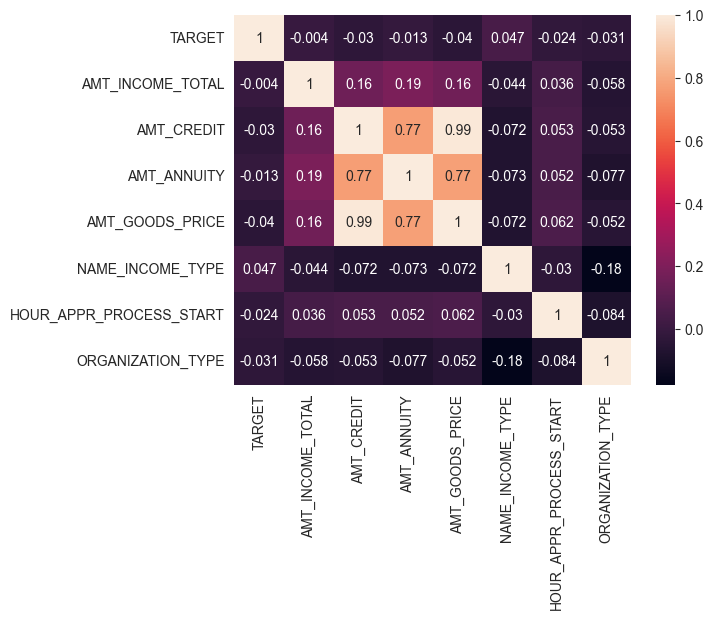

In [56]:
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

**Feature Selection**

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [112]:
X = df.drop("TARGET",axis=1)
y = df.TARGET

In [114]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

In [113]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_scaled = pd.DataFrame(std_scaler.fit_transform(X),columns=X.columns)
df_scaled.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.142129,-0.478095,-0.166146,-0.507236,0.915580,-0.631821,-1.194830
1,0.426792,1.725450,0.592666,1.599974,-0.263424,-0.325620,0.466663
2,-0.427196,-1.152888,-1.404649,-1.091895,0.915580,-0.938022,-0.901625
3,-0.142533,-0.711430,0.177865,-0.653401,0.915580,1.511587,-1.194830
4,-0.199466,-0.213734,-0.361748,-0.068741,0.915580,-0.325620,0.368928


**Train, Test and Split**

In [115]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

X_train.shape,X_test.shape

((215257, 7), (92254, 7))

In [116]:
X_train

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
208983,202500.0,585000.0,29250.0,585000.0,4,10,11
71687,112500.0,656811.0,30564.0,567000.0,3,11,57
301340,144000.0,450000.0,22500.0,450000.0,1,10,4
216927,450000.0,1483231.5,51687.0,1354500.0,4,18,41
109091,202500.0,454500.0,19255.5,454500.0,1,9,5
...,...,...,...,...,...,...,...
21440,292500.0,2013840.0,53253.0,1800000.0,7,11,55
117583,157500.0,599778.0,32665.5,477000.0,7,6,11
73349,135000.0,270000.0,13500.0,270000.0,1,12,5
267336,135000.0,781920.0,47835.0,675000.0,7,14,40


In [117]:
X_test

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
64282,135000.0,654498.0,31617.0,585000.0,3,9,57
94645,135000.0,234576.0,25393.5,202500.0,7,17,11
306349,112500.0,157914.0,16753.5,139500.0,7,14,33
258314,247500.0,1125000.0,36292.5,1125000.0,7,16,40
87597,202500.0,900000.0,35158.5,900000.0,7,8,42
...,...,...,...,...,...,...,...
98497,81000.0,808650.0,26217.0,675000.0,7,16,40
205542,99000.0,135000.0,10822.5,135000.0,7,14,42
127474,157500.0,675000.0,38880.0,675000.0,7,10,42
46981,112500.0,1006920.0,42790.5,900000.0,3,11,57


**Random forest Classifier**

Random forest is a type of Supervised Machine Learning Algorithm that is commonly used in classification and regression problems. It constructs decision trees from various samples and uses their majority vote for classification and average for regression.

In [118]:
# Applying random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators = 10, random_state = 0,criterion='gini')
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [119]:
y_pred = rf_Classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[83973   814]
 [ 7316   151]]


0.9118737398920372

In [121]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84787
           1       0.16      0.02      0.04      7467

    accuracy                           0.91     92254
   macro avg       0.54      0.51      0.49     92254
weighted avg       0.86      0.91      0.88     92254



In [122]:
X_test

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
64282,135000.0,654498.0,31617.0,585000.0,3,9,57
94645,135000.0,234576.0,25393.5,202500.0,7,17,11
306349,112500.0,157914.0,16753.5,139500.0,7,14,33
258314,247500.0,1125000.0,36292.5,1125000.0,7,16,40
87597,202500.0,900000.0,35158.5,900000.0,7,8,42
...,...,...,...,...,...,...,...
98497,81000.0,808650.0,26217.0,675000.0,7,16,40
205542,99000.0,135000.0,10822.5,135000.0,7,14,42
127474,157500.0,675000.0,38880.0,675000.0,7,10,42
46981,112500.0,1006920.0,42790.5,900000.0,3,11,57


In [125]:
result = rf_Classifier.predict(np.array([[192500.0,157914.0,15753.5,139500.0,3,15,33]]))
result


C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)